成功加载数据。
文件的前几行数据：
   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44         

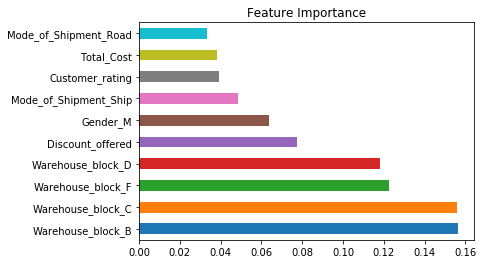

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os

# 1. 数据加载
file_path = r'C:\Users\86136\15周\kaggle数据集.xlsx'

# 检查文件是否存在
if not os.path.exists(file_path):
    raise FileNotFoundError(f"文件路径不存在: {file_path}")

# 尝试加载Excel文件
try:
    data = pd.read_excel(file_path)
    print("成功加载数据。")
    print("文件的前几行数据：")
    print(data.head())
except Exception as e:
    print(f"无法加载数据，错误信息：{e}")

# 2. 数据预处理
# 检查并处理缺失值
print("原始数据缺失值情况：")
print(data.isnull().sum())

# 填充缺失值（根据实际情况选择填充方法）
data.fillna(method='ffill', inplace=True)  # 使用前向填充

# 检查处理后的缺失值情况
print("\n处理后数据缺失值情况：")
print(data.isnull().sum())

# 将分类变量转换为数值
data = pd.get_dummies(data, columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], drop_first=True)

# 3. 特征工程
# 创建新特征：总成本（产品成本 + 折扣）
data['Total_Cost'] = data['Cost_of_the_Product'] + data['Discount_offered']

# 4. 保存预处理后的数据
output_file_path = r'C:\Users\86136\15周\预处理后的数据.xlsx'
try:
    data.to_excel(output_file_path, index=False)
    print(f"预处理后的数据已保存到：{output_file_path}")
except Exception as e:
    print(f"无法保存预处理后的数据，错误信息：{e}")

# 5. 模型训练
# 选择特征和目标变量
features = data.drop(columns=['ID', 'Reached.on.Time_Y.N'])
target = data['Reached.on.Time_Y.N']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 训练逻辑回归模型
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. 模型评估
# 使用模型进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 输出混淆矩阵和分类报告
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. 智能补货逻辑
# 假设补货策略基于预测结果
# 如果预测产品会按时到达，则正常补货；否则，提前补货
data['Reorder_Suggestion'] = np.where(data['Reached.on.Time_Y.N'] == 1, 'Normal', 'Early')

# 输出补货建议
print(data[['ID', 'Reorder_Suggestion']])

# 8. 可视化
# 绘制特征重要性
feature_importance = pd.Series(model.coef_[0], index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()